In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
csvpath = r'\Users\Nickaruto\Desktop\Project-1\Resources\traffic_fatalities_clean.csv'
traffic_fatalities_df = pd.read_csv(csvpath)
traffic_fatalities_df

,YEAR,Butte,Imperial,Los Angeles,Orange,Placer,San Diego,San Francisco,Shasta
0,2002,47,50,724,191,45,309,39,37
1,2003,29,45,812,213,41,295,52,34
2,2004,34,57,753,212,33,299,43,37
3,2005,35,48,750,203,44,309,33,38
4,2006,34,42,799,208,40,303,42,23
5,2007,37,42,765,194,28,292,53,25
6,2008,32,46,711,163,29,263,35,21
7,2013,21,28,625,186,21,198,35,24
8,2014,24,46,639,173,13,233,33,22
9,2015,33,28,651,183,21,246,38,40


In [4]:
#setting year ranges
#before the release of rideshare apps
traffic_fatalities_df_b4 = traffic_fatalities_df.loc[traffic_fatalities_df['YEAR'] < 2013]

#series for just the years for passing into plt.scatter later
years_b4 = traffic_fatalities_df_b4['YEAR']

#after the release of rideshare apps
traffic_fatalities_df_after = traffic_fatalities_df.loc[traffic_fatalities_df['YEAR'] > 2008]

#series for just the years for passing into plt.scatter later
years_after = traffic_fatalities_df_after['YEAR']

#all years 2002-2008, 2013-2019
years = traffic_fatalities_df['YEAR']

In [5]:
#dropping all of the columns to use a sum function
rural_only_df = traffic_fatalities_df.drop(columns=['YEAR','Los Angeles','Orange', 'San Diego', 'San Francisco'])

#summing all rural counties
rural_sums = rural_only_df.sum(axis=1)

#new df with years and rural sums
rural_sums_df = pd.DataFrame({'Year' : years, 'Rurals Sum': rural_sums })
rural_sums_df


,Year,Rurals Sum
0,2002,179
1,2003,149
2,2004,161
3,2005,165
4,2006,139
5,2007,132
6,2008,128
7,2013,94
8,2014,105
9,2015,122


In [6]:
urban_only_df = traffic_fatalities_df.drop(columns=['YEAR','Placer', 'Shasta', 'Imperial', 'Butte'])
urban_sums = urban_only_df.sum(axis=1)

urban_sums_df = pd.DataFrame({'Year' : years, 'Urbans Sum': urban_sums})
urban_sums_df

,Year,Urbans Sum
0,2002,1263
1,2003,1372
2,2004,1307
3,2005,1295
4,2006,1352
5,2007,1304
6,2008,1172
7,2013,1044
8,2014,1078
9,2015,1118


In [7]:
sums_df = pd.merge(rural_sums_df, urban_sums_df)
sums_df.head()

,Year,Rurals Sum,Urbans Sum
0,2002,179,1263
1,2003,149,1372
2,2004,161,1307
3,2005,165,1295
4,2006,139,1352


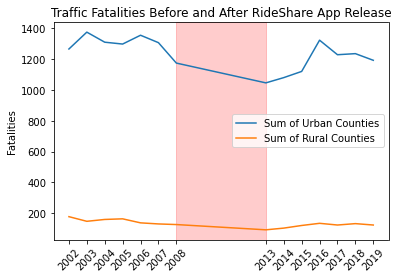

In [9]:
plt.plot(years, sums_df['Urbans Sum'], label = 'Sum of Urban Counties')
plt.plot(years, sums_df['Rurals Sum'], label = 'Sum of Rural Counties')

plt.xticks(years, rotation = 45)
plt.axvspan(2008, 2013, color='red', alpha=0.2)
plt.ylabel('Fatalities')
plt.title('Traffic Fatalities Before and After RideShare App Release')
plt.legend()

plt.savefig("../Traffic Fatalities Plots/Traffic Fatalities Before and After RideShare App Release.png")

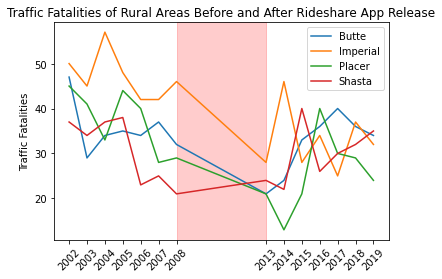

In [10]:
rural_list = ['Butte', 'Imperial', 'Placer', 'Shasta']
years = traffic_fatalities_df['YEAR']

for county in rural_list:
    county_fatals = traffic_fatalities_df[f'{county}']
    plt.plot(years, county_fatals, label = f'{county}')

plt.xticks(years, rotation = 45)
plt.axvspan(2008, 2013, color='red', alpha=0.2)
plt.title('Traffic Fatalities of Rural Areas Before and After Rideshare App Release')
plt.ylabel('Traffic Fatalities')
plt.legend()

plt.savefig("../Traffic Fatalities Plots/Traffic Fatalities of Rural Areas Before and After RideShare App Release.png")

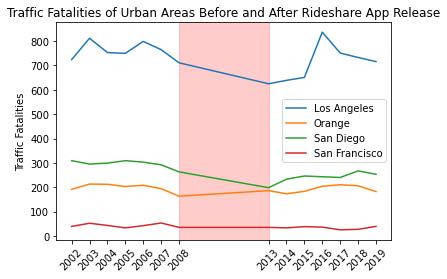

In [11]:
urban_list = ['Los Angeles', 'Orange', 'San Diego', 'San Francisco']
years = traffic_fatalities_df['YEAR']

for county in urban_list:
    county_fatals = traffic_fatalities_df[f'{county}']
    plt.plot(years, county_fatals, label = f'{county}')

plt.xticks(years, rotation = 45)
plt.axvspan(2008, 2013, color='red', alpha=0.2)
plt.title('Traffic Fatalities of Urban Areas Before and After Rideshare App Release')
plt.ylabel('Traffic Fatalities')
plt.legend()

plt.savefig("../Traffic Fatalities Plots/Traffic Fatalities of Urban Areas Before and After Rideshare App Release.png")

everything under this is split into before and after rideshare app periods, but it's hard to see trends in this split

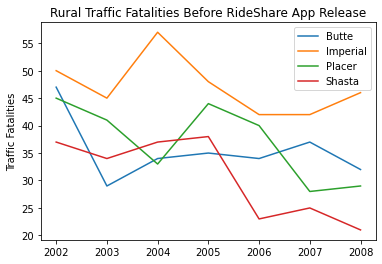

In [ ]:
#rurals before 2002-2008
rural_list = ['Butte', 'Imperial', 'Placer', 'Shasta']

for county in rural_list:
    county_fatals = traffic_fatalities_df_b4[f'{county}']
    plt.plot(years_b4, county_fatals, label = f'{county}')

plt.ylabel('Traffic Fatalities')
plt.title('Rural Traffic Fatalities Before RideShare App Release')
plt.legend()

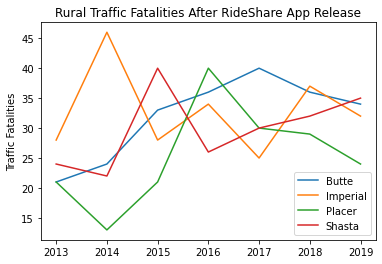

In [ ]:
#rurals after 2013-2019
for county in rural_list:
    county_fatals = traffic_fatalities_df_after[f'{county}']
    plt.plot(years_after, county_fatals, label = f'{county}')

plt.ylabel('Traffic Fatalities')
plt.title('Rural Traffic Fatalities After RideShare App Release')
plt.legend()

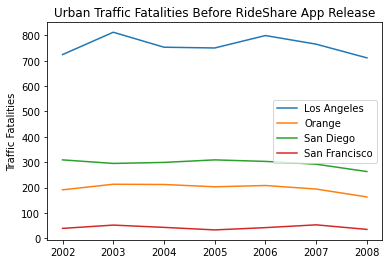

In [ ]:
#urbans before 2002-2008
urban_list = ['Los Angeles', 'Orange', 'San Diego', 'San Francisco']

for county in urban_list:
    county_fatals = traffic_fatalities_df_b4[f'{county}']
    plt.plot(years_b4, county_fatals, label = f'{county}')

plt.ylabel('Traffic Fatalities')
plt.title('Urban Traffic Fatalities Before RideShare App Release')
plt.legend()


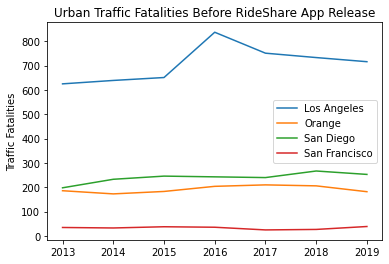

In [ ]:
#urbans 2013-2019
urban_list = ['Los Angeles', 'Orange', 'San Diego', 'San Francisco']

for county in urban_list:
    county_fatals = traffic_fatalities_df_after[f'{county}']
    plt.plot(years_after, county_fatals, label = f'{county}')

plt.ylabel('Traffic Fatalities')
plt.title('Urban Traffic Fatalities Before RideShare App Release')
plt.legend()